In [14]:
###GOM22SP###

#Station 14
Data1 = [[28.72642000, -89.61462000],
[28.72642000, -89.61461184],
[28.72642000, -89.61423224],
[28.72634000, -89.61363184],
[28.72626000, -89.61326163],
[28.72613673, -89.61276531],
[28.72605102, -89.61236000],
[28.72598000, -89.61200000],
[28.72598000, -89.61199918],
[28.72596000, -89.61192000],
[28.72585061, -89.61148245],
[28.72582000, -89.61132000]]

#Station 16
Data2 = [[28.91276000, -89.54494000],
[28.91277959, -89.54495959],
[28.91330000, -89.54498000],
[28.91392367, -89.54504000],
[28.91476000, -89.54508000],
[28.91530000, -89.54506245],
[28.91540000, -89.54506000],
[28.91542000, -89.54506000],
[28.91597796, -89.54511020],
[28.91712000, -89.54518000],
[28.91712930, -89.54518000],
[28.91714000, -89.54518000]]

#Station 17
Data3 = [[28.91718000, -89.85982524],
[28.91718000, -89.85982000],
[28.91718000, -89.85974000],
[28.91722900, -89.85986000],
[28.91724000, -89.85986000],
[28.91724000, -89.86008000],
[28.91722000, -89.86010000],
[28.91724000, -89.86008000],
[28.91726000, -89.86001796]]

#Station 2
Data4 = [[28.89924000, -89.60452000],
[28.89924000, -89.60452000],
[28.89944653, -89.60482000],
[28.89972000, -89.60522000],
[28.89980000, -89.60530000],
[28.89992653, -89.60550000],
[28.90014000, -89.60588000],
[28.90020000, -89.60598000],
[28.90024000, -89.60606000],
[28.90026000, -89.60608000]]

#Station 4
Data5 = [[28.79878000, -90.70664000],
[28.79878000, -90.70664000],
[28.79880000, -90.70660000],
[28.79880000, -90.70660000],
[28.79882000, -90.70662000],
[28.79882000, -90.70662000],
[28.79879224, -90.70662163],
[28.79880000, -90.70662000],
[28.79879388, -90.70662000]]

#Station 5b
Data6 = [[28.80868000, -91.33571592],
[28.80868000, -91.33574000],
[28.80884000, -91.33771388],
[28.80884000, -91.33772694],
[28.80888000, -91.33844178],
[28.80888000, -91.33846204],
[28.80892000, -91.33952531],
[28.80898000, -91.34019143],
[28.80900000, -91.34022367]]

#Station 7
Data7 = [[28.94488000, -88.85850000],
[28.94488000, -88.85850000],
[28.94470000, -88.85916000],
[28.94446000, -88.85982000],
[28.94430000, -88.86035388],
[28.94417510, -88.86072000],
[28.94402531, -88.86100490],
[28.94392000, -88.86134000],
[28.94390816, -88.86135184]]

#Station 9
Data8 = [[28.78728000, -89.60525500],
[28.78728000, -89.60526612],
[28.78728000, -89.60636000],
[28.78726000, -89.60734000],
[28.78726000, -89.60789306],
[28.78726000, -89.60817510],
[28.78732000, -89.60932163],
[28.78732000, -89.60972286],
[28.78732000, -89.60974612]]

#Station MK
Data9 = [[28.90238000, -90.30920000],
[28.90238000, -90.30920000],
[28.90238408, -90.30923592],
[28.90240000, -90.30924000],
[28.90240000, -90.30924000],
[28.90244000, -90.30922082],
[28.90244000, -90.30922000],
[28.90243020, -90.30924000],
[28.90243469, -90.30926000]]


###GOM21FA###



###GOM22SU###



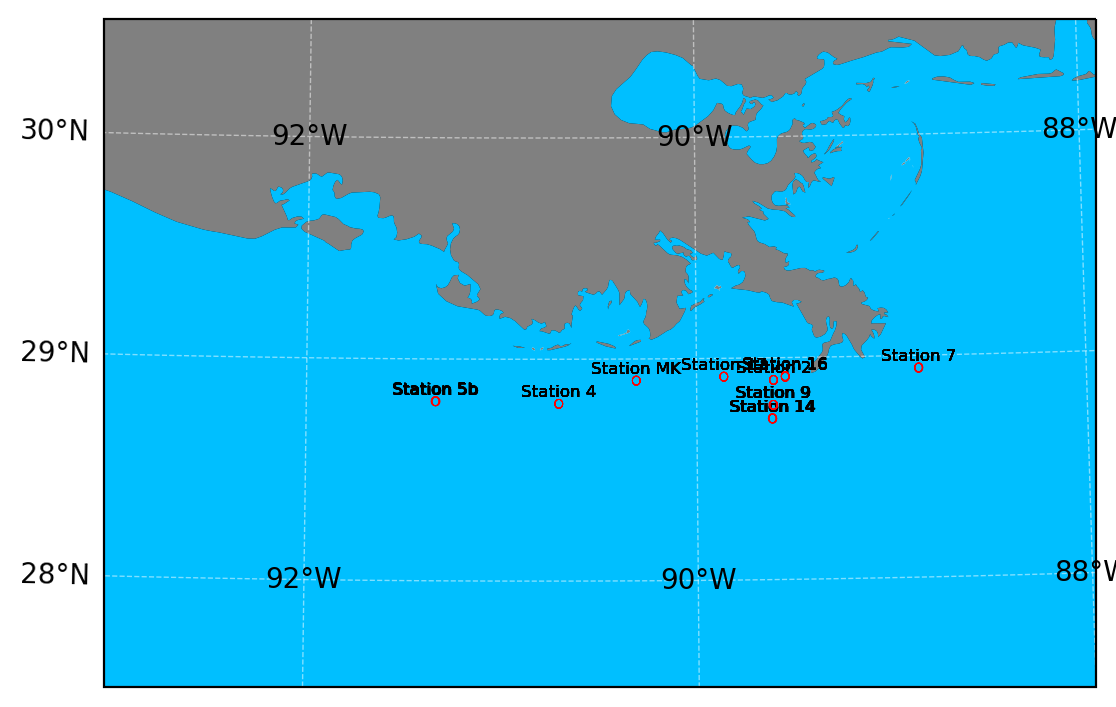

In [15]:
from satpy import Scene, find_files_and_readers
from pyresample import create_area_def
from satpy.writers import get_enhanced_image
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
from glob import glob
from satpy import MultiScene
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import xarray as xr
import matplotlib.patches as mpatches

######

lat_0, lon_0 = 28.5, -90.8

lat_top=30.5
lat_bot=27.5
lon_left=-88
lon_rigth=-93



extent=[lon_left, lon_rigth, lat_bot, lat_top]
resval = 1000
res = xr.DataArray(resval, attrs={"units": "meters"})

def plot_mapbase(extent=extent, res='10m', projection=ccrs.PlateCarree(), ax=None):
    if ax is None:
        fig = plt.figure(dpi=200) # set fig size
        ax = fig.add_subplot(111, projection=projection)
    ax.set_extent(extent, crs=ccrs.PlateCarree())
    ax.coastlines(res)
    ax.add_feature(cfeature.NaturalEarthFeature(category='physical', 
                                                name='land',
                                                facecolor='grey', # change color here
                                                scale=res))
    ax.add_feature(cfeature.NaturalEarthFeature(category='physical', 
                                                name='ocean',
                                                facecolor='deepskyblue', # change color here
                                                scale=res))
    for coord in Data1:
        rad = 0.02
        ax.add_patch(mpatches.Circle(xy=[coord[1], coord[0]], fill=False, linewidth=0.3, radius=rad, color='red', alpha=1, transform=ccrs.PlateCarree(), zorder=30))
        ax.annotate("Station 14", xy=(coord[1], coord[0]), xytext=(coord[1], coord[0]+rad), color='black', fontsize=6, ha='center', va='bottom', transform=ccrs.PlateCarree())

    for coord in Data2:
        ax.add_patch(mpatches.Circle(xy=[coord[1], coord[0]], fill=False, linewidth=0.3, radius=rad, color='red', alpha=1, transform=ccrs.PlateCarree(), zorder=30))
        ax.annotate("Station 16", xy=(coord[1], coord[0]), xytext=(coord[1], coord[0]+rad), color='black', fontsize=6, ha='center', va='bottom', transform=ccrs.PlateCarree())

    for coord in Data3:
        ax.add_patch(mpatches.Circle(xy=[coord[1], coord[0]], fill=False, linewidth=0.3, radius=rad, color='red', alpha=1, transform=ccrs.PlateCarree(), zorder=30))
        ax.annotate("Station 17", xy=(coord[1], coord[0]), xytext=(coord[1], coord[0]+rad), color='black', fontsize=6, ha='center', va='bottom', transform=ccrs.PlateCarree())

    for coord in Data4:
        ax.add_patch(mpatches.Circle(xy=[coord[1], coord[0]], fill=False, linewidth=0.3, radius=rad, color='red', alpha=1, transform=ccrs.PlateCarree(), zorder=30))
        ax.annotate("Station 2", xy=(coord[1], coord[0]), xytext=(coord[1], coord[0]+rad), color='black', fontsize=6, ha='center', va='bottom', transform=ccrs.PlateCarree())

    for coord in Data5:
        ax.add_patch(mpatches.Circle(xy=[coord[1], coord[0]], fill=False, linewidth=0.3, radius=rad, color='red', alpha=1, transform=ccrs.PlateCarree(), zorder=30))
        ax.annotate("Station 4", xy=(coord[1], coord[0]), xytext=(coord[1], coord[0]+rad), color='black', fontsize=6, ha='center', va='bottom', transform=ccrs.PlateCarree())

    for coord in Data6:
        ax.add_patch(mpatches.Circle(xy=[coord[1], coord[0]], fill=False, linewidth=0.3, radius=rad, color='red', alpha=1, transform=ccrs.PlateCarree(), zorder=30))
        ax.annotate("Station 5b", xy=(coord[1], coord[0]), xytext=(coord[1], coord[0]+rad), color='black', fontsize=6, ha='center', va='bottom', transform=ccrs.PlateCarree())

    for coord in Data7:
        ax.add_patch(mpatches.Circle(xy=[coord[1], coord[0]], fill=False, linewidth=0.3, radius=rad, color='red', alpha=1, transform=ccrs.PlateCarree(), zorder=30))
        ax.annotate("Station 7", xy=(coord[1], coord[0]), xytext=(coord[1], coord[0]+rad), color='black', fontsize=6, ha='center', va='bottom', transform=ccrs.PlateCarree())

    for coord in Data8:
        ax.add_patch(mpatches.Circle(xy=[coord[1], coord[0]], fill=False, linewidth=0.3, radius=rad, color='red', alpha=1, transform=ccrs.PlateCarree(), zorder=30))
        ax.annotate("Station 9", xy=(coord[1], coord[0]), xytext=(coord[1], coord[0]+rad), color='black', fontsize=6, ha='center', va='bottom', transform=ccrs.PlateCarree())

    for coord in Data9:
        ax.add_patch(mpatches.Circle(xy=[coord[1], coord[0]], fill=False, linewidth=0.3, radius=rad, color='red', alpha=1, transform=ccrs.PlateCarree(), zorder=30))
        ax.annotate("Station MK", xy=(coord[1], coord[0]), xytext=(coord[1], coord[0]+rad), color='black', fontsize=6, ha='center', va='bottom', transform=ccrs.PlateCarree())

    gl = ax.gridlines(crs=ccrs.PlateCarree(),
                 ylocs=[28, 29, 30], 
                 xlocs=[-94, -92, -90, -88], 
                 draw_labels=True, linewidth=0.5, color='w', alpha=0.5, linestyle='--')
    gl.right_labels = False
    gl.top_labels = False
    return ax

mapbase = plot_mapbase(projection= ccrs.LambertConformal(central_longitude=lon_0, central_latitude=lat_0))

######
        
        


In [ ]:
def Cruisefigure(cruise):
    
    i=0
    base = glob('/home/hboi-ouri/Projects/RS_Files/MODISGrids/CombinedMODIS/CruiseaCDOM/' + cruise + '*MODIS_L2_aCDOM.nc')   

    #area in the figure
    extent = [-94, 27.5, -88, 30.5]
    my_area = create_area_def('my_area', {'proj': 'lcc', 'lon_0': -91., 'lat_0': 29.5, 'lat_1': 29.5, 'lat_2': 29.5},
                    width=1500, height=750,
                    area_extent=extent, units='degrees')
        
    fig =  plt.figure(figsize=(6, 4), dpi=200)


#     dayfiles = glob(base+swat+'*')
#     scn = Scene(dayfiles, reader='modis_l1b')
#     scn.load(['true_color'])

#     #reproject
#     new_scn = scn.resample(my_area)

#     #generate RGB from true color
#     rgb = get_enhanced_image(new_scn['true_color'])

#     #extract projection and lon lat from products
#     crs = new_scn['true_color'].attrs['area'].to_cartopy_crs()
#     lons, lats = new_scn['true_color'].attrs['area'].get_lonlats()

#     #left true color
#     ax1 = plt.subplot(projection=crs)
#     rgb.data.plot.imshow(rgb='bands', transform=crs, ax=ax1)

#     plot_mapbase(ax=ax1)






    ds = xr.open_dataset(base[0])
    data = ds.acdom.count('time')
    ax1 = plt.subplot(projection=ccrs.PlateCarree())
    im = data.where(data!=0).plot(ax=ax1, vmin=0, vmax=15, x='lon', y='lat', add_colorbar=False) #transform=projection)
    ax1.set_title('Test', fontsize=8)
#     ax.set_ylabel('Latitude')
#     ax.set_xlabel('Longitude')

    fig.colorbar(im)

    fig.text(0.75, 0.42, 'Counts', size=13, rotation=90)


    plot_mapbase(ax=ax1)




    #title & save
    ax1.set_title('MODIS AQUA - GOMEX Counts; Jul6-Jul28, 2022')
    fig.text(0.125, 0.41, 'Latitude', size=13, rotation=90)
    fig.text(0.425, 0.02, 'Longitude', size=13)
    fig.savefig('/home/hboi-ouri/Projects/NASA_ProjectExp/outputs/Tasks/Task2/Counts_' + cruise + '.png')
    fig.savefig('/home/hboi-ouri/Downloads/Test.png')
    fig.clear()
        


<xarray.Dataset>
Dimensions:  (y: 337, x: 287, time: 35)
Coordinates:
  * y        (y) float64 2.807e+05 2.797e+05 2.787e+05 ... -5.408e+04 -5.508e+04
  * x        (x) float64 -1.914e+04 -1.814e+04 ... 2.654e+05 2.664e+05
    lon      (y, x) float64 ...
    lat      (y, x) float64 ...
  * time     (time) datetime64[ns] 2021-10-22T18:15:00.881000 ... 2021-11-13T...
Data variables:
    Rrs_412  (time, y, x) float32 ...
    Rrs_443  (time, y, x) float32 ...
    Rrs_469  (time, y, x) float32 ...
    Rrs_488  (time, y, x) float32 ...
    Rrs_531  (time, y, x) float32 ...
    Rrs_547  (time, y, x) float32 ...
    Rrs_555  (time, y, x) float32 ...
    Rrs_645  (time, y, x) float32 ...
    Rrs_667  (time, y, x) float32 ...
    Rrs_678  (time, y, x) float32 ...
    acdom    (time, y, x) float32 ...
Attributes: (12/48)
    title:                          MODISA Level-2 Data
    product_name:                   AQUA_MODIS.20211022T181500.L2.OC.nc
    processing_version:             R2022.0
    equ

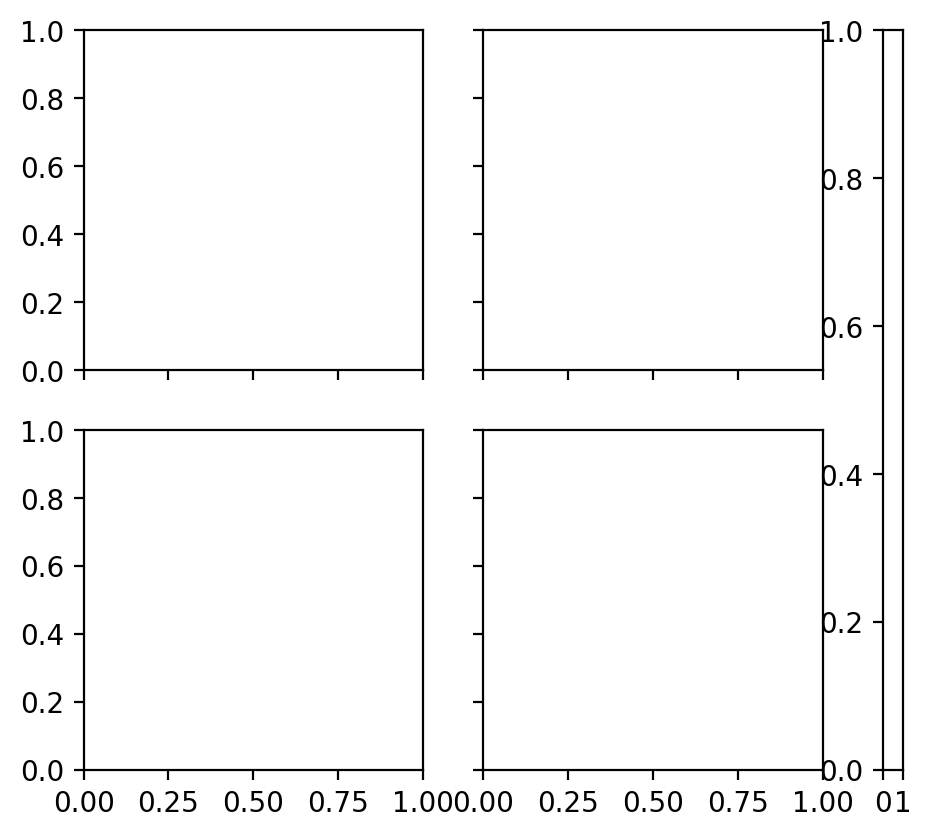

In [4]:
from mpl_toolkits.axes_grid1 import AxesGrid
import matplotlib.pyplot as plt
from glob import glob
import xarray as xr
import pandas as pd
import numpy as np1
from pyresample import geometry, create_area_def
from satpy import Scene
import cartopy.crs as ccrs
from cartopy.mpl.geoaxes import GeoAxes
import cartopy.feature as cfeature

year= ''
#cfile = glob('/home/hboi-ouri/Projects/NASA_ProjectExp/outputs/CombinedNC/MODIS/' + year + '/*MODIS_L2.nc')
#cfile = glob('/home/hboi-ouri/Projects/RS_Files/MODISGrids/CombinedMODIS/Storms/' + year + 'aCDOM/*MODIS_L2_aCDOM.nc')
cfile = glob('/home/hboi-ouri/Projects/RS_Files/MODISGrids/CombinedMODIS/CruiseaCDOM/*MODIS_L2_aCDOM.nc')

cfile.sort()

lat_top=31
lat_bot=28
lon_left=-88
lon_rigth=-93
extent=[lon_left, lon_rigth, lat_bot, lat_top]

resval = 1000 # resolution of the sat product (300 m for Sentinel and MERIS, 1 km for MODIS)
res = xr.DataArray(resval, attrs={"units": "meters"})

projection = ccrs.PlateCarree()
axes_class = (GeoAxes,
              dict(map_projection=projection))

fig = plt.figure(dpi=200) # set fig size

axgr = AxesGrid(fig, 111, #axes_class=axes_class,
                    nrows_ncols=(2, 2),
                    axes_pad=0.3,
                    #share_all=True,
                    cbar_location='right',
                    cbar_mode='single',
                    cbar_pad=0.3,
                    cbar_size='3%',
                    label_mode='L'
               )

#fig2 = plt.figure(dpi=200) # set fig size

# axgr2 = AxesGrid(fig2, 111, axes_class=axes_class,
#                     nrows_ncols=(3, 2),
#                     axes_pad=0.1,
#                     #share_all=True,
#                     cbar_location='right',
#                     cbar_mode='single',
#                     cbar_pad=0.4,
#                     cbar_size='3%',
#                     label_mode=''
#                 )

#for axTitle:
#title = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
#title = ['July', 'September', 'October', 'November', 'December']
title = ['Oct 22, 2021 - Nov 14, 2021', 'Jul 15, 2021 - Jul 27, 2021', 
         'Apr 17, 2022 - Apr 24, 2022', 'Jul 06, 2022 - Jul 28, 2022']
#title = ['Bonnie', 'Five', 'Lee', 'Isaac', 'Cindy', 'Harvey', 'Barry', 'Olga', 'Laura', 'Delta', 'Zeta']


for i, ax in enumerate(axgr):
    #axgr[i].coastlines()
    #axgr[i].set_extent(extent)
    #axgr2[i].coastlines()
    #axgr2[i].set_extent(extent)
    try:
        ds = xr.open_dataset(cfile[i])
        print(ds)
    except:
        pass
        
        
        
        